### Problem Set 3

who is the central player in this
technology area ? Who is the leader ? Who is an irrelevant actor ?

In [6]:
import networkx as nx
import operator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import community
from networkx.algorithms.community import k_clique_communities


In [32]:
G = nx.read_edgelist('network_prof.txt')
       
# function that generate connected components as subgraphs:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

# check number of components of the network:

graph_max = max(connected_component_subgraphs(G))
graph_min = min(connected_component_subgraphs(G))

print("Information about the network: \n" + nx.info(G))
print("\nInformation about the max subgraph: \n" + nx.info(graph_max))
print("\nInformation about the min subgraph: \n" + nx.info(graph_min))

if G.number_of_nodes() == graph_max.number_of_nodes():
    # the number of nodes of the network is equal to the max subgraph. so there is only one subgraph.
    # we could have done the same with the min
    print("We only have one directed component")

Information about the network: 
Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910

Information about the max subgraph: 
Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910

Information about the min subgraph: 
Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910
We only have one directed component


In [87]:
nodes = list(G.nodes)
num_nodes = G.number_of_nodes()

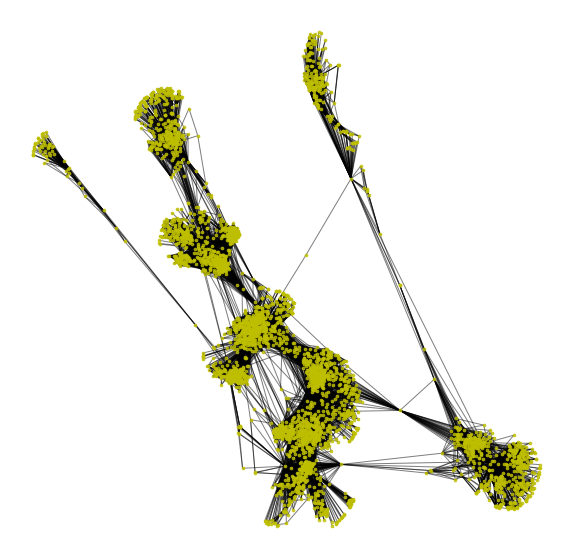

In [129]:
# picture of the network:

plt.figure(figsize=(10,10))
position = nx.spring_layout(G) # position nodes using Fruchterman-Reingold force-directed algorithm.
nx.draw_networkx_nodes(G, position, nodes, node_size = 7, node_color = 'y' , alpha = 0.8)

nx.draw_networkx_edges(G, position, alpha = 0.5)
plt.axis('off')
plt.show()

At this point we have to analyise our network. To understand the leader and irrelevant actors, we measure the vertex importance:

**Node Degree**: The node degree is the number of edges adjacent to the node

In [74]:
nodes_degree = G.degree
print(f" For example, node number '{list(nodes_degree)[0][0]}' degree is equal to {list(nodes_degree)[0][1]}.")

 For example, node number '0' degree is equal to 347.


In our dataset, each node is a person. Then the degree of that person is the number of people he/she is talking to. Let us see who are the people with more contacts:

In [121]:
degrees = [val for (node, val) in G.degree()] #only the values
nodes = [node for (node, val) in G.degree()] #only the node

Z = [x for _,x in sorted(zip(degrees,nodes), reverse=True)][0:10] # first ten nodes
degree_most_connected = G.degree(Z)
list(degree_most_connected)[:][1]

print("Nodes with higest degree")
for i in range(10):
    print(f"Position #{i+1} for degree: node {list(degree_most_connected)[i][0]} with degree {list(degree_most_connected)[i][1]}")

Nodes with higest degree
Position #1 for degree: node 107 with degree 1045
Position #2 for degree: node 1684 with degree 792
Position #3 for degree: node 1912 with degree 755
Position #4 for degree: node 3437 with degree 547
Position #5 for degree: node 0 with degree 347
Position #6 for degree: node 2543 with degree 294
Position #7 for degree: node 2347 with degree 291
Position #8 for degree: node 1888 with degree 254
Position #9 for degree: node 1800 with degree 245
Position #10 for degree: node 1663 with degree 235


Highlight these nodes in the network:

In [ ]:
print("Highlight nodes with the highest centrality")

plt.figure(figsize=(10,10))

nx.draw_networkx_nodes(G, position, nodes, node_size = 7, node_color = 'y' , alpha = 0.7)
nx.draw_networkx_nodes(G, position, Z, node_size = 14, node_color = 'r')

nx.draw_networkx_edges(G, position, alpha = 0.5)
plt.axis('off')
plt.show()

**Betweenness**: measures how frequently a mode is in the shortest path between any two nodes

In [ ]:
betweenness = nx.betweenness_centrality(G) # compute the shortest-path betweenness centrality for nodes. return a dictionary
betweenness